### Goal: Classify flowers into species using petal/sepal measurements.
Algorithm: K-Nearest Neighbors
Steps:
1. Load the Iris dataset.
2. Train K-NN with different values of k (try 1, 3, 5, 7).
3. Plot accuracy vs. k to see how it changes.
4. Compare performance with logistic regression.

### 1. Load the Iris dataset.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [8]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# Map numerical labels to flower names
iris_df["species_name"] = iris_df["species"].map({
    0: "setosa",
    1: "versicolor",
    2: "virginica"
})

# Display the updated DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [11]:
# Count the frequency of each species
species_counts = iris_df["species_name"].value_counts()

# Display result
print(species_counts)


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


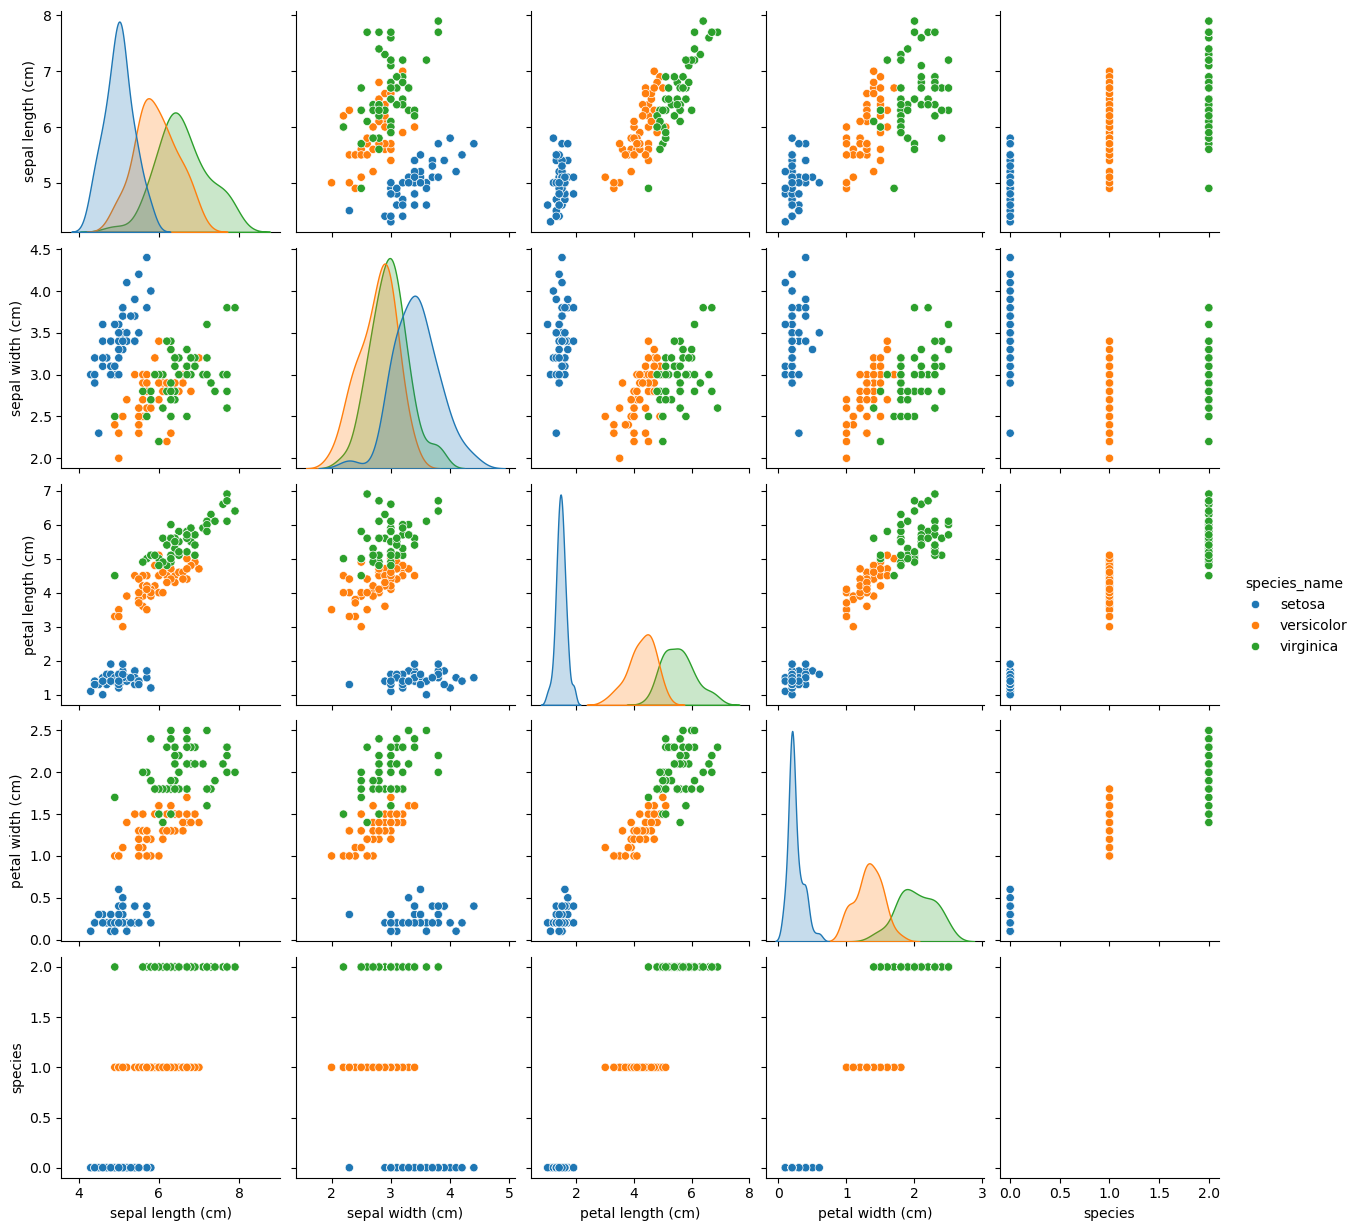

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot to visualize feature relationships by species
sns.pairplot(iris_df, hue="species_name", diag_kind="kde")

# Show the plot
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### 2. Train K-NN with different values of k (try 1, 3, 5, 7).

In [15]:
# Define input features (all columns except target variables)
X = iris_df.drop(columns=["species", "species_name"])

# Define output labels (numeric species)
y = iris_df["species"]


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,                 # using numeric labels
    test_size=0.2,     # 20% test data
    random_state=123,  # different seed for reproducibility
    stratify=y         # keep class distribution balanced
)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Store results for different k values
knn_scores = []

# Test odd values of k from 1 to 9
for neighbors in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)       # Train the model
    predictions = model.predict(X_test)  # Make predictions
    score = accuracy_score(y_test, predictions)  # Calculate accuracy
    knn_scores.append(score)
    print(f"Accuracy with k={neighbors}: {score:.3f}")


Accuracy with k=1: 0.933
Accuracy with k=3: 0.933
Accuracy with k=5: 0.933
Accuracy with k=7: 0.900
Accuracy with k=9: 0.933


### 3. Plot accuracy vs. k to see how it changes.

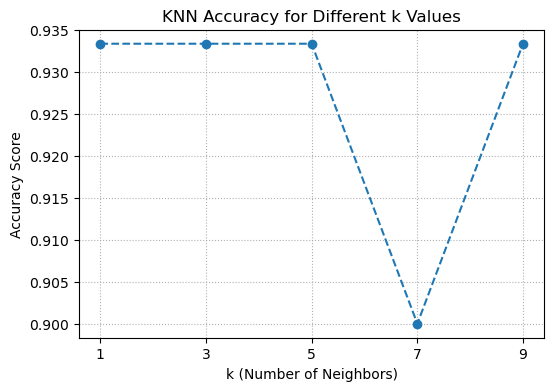

In [18]:
import matplotlib.pyplot as plt

# Plot accuracy for different k values
k_values = list(range(1, 10, 2))

plt.figure(figsize=(6, 4))
plt.plot(k_values, knn_scores, marker="o", linestyle="--")

plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy Score")
plt.xticks(k_values)
plt.grid(True, linestyle=":")
plt.show()


### 4. Compare performance with logistic regression.

In [19]:
# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=300, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
lr_predictions = log_model.predict(X_test)

# Evaluate accuracy
log_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Test Accuracy: {log_accuracy:.3f}")

Logistic Regression Test Accuracy: 0.967
